# LDA-based Analysis of SyntheticMass: A Case Study for COVID EHR Data
David Chen under the direction of Dr. Hollis Wright and Dr. Kemal Sonmez | Omics Data Automation, Summer 2020

## Goal and Motivation
The disease landscape is changing rapidly like never before and the need for clear data aggregation and analysis is growing. For-profit hospitals, academic medical centers, and public health agencies desire effective tools for understanding large amounts of health data in record time. Although the patient remains the focus, the COVID-19 pandemic has proved that larger population-based studies can yield important insights. The **goal** of this project is to correctly sort synthetic EHR data using topic modelling algorithms such as *latent dirichlet allocation or LDA*. More broadly, the **motivation** for this project is to act as a proof of concept for similar based analysis of COVID EHR data.

## Methods
![LDA Overview](/Users/davidwc2008/Downloads/LDA_Overview.jpg)
<center> *Image: David M. Blei. Probalistic Topic Models- Doi:10.1145/2133806.2133826* <center>

LDA is the most common topic model in use today and many packages have been developed to support its implementation. *Gensim* and *Mallet* are two packages that have been widely used. Both packages were attempted, but only the Gensim implementation of LDA was succsesful. Gensim is used widely across industries including by Sports Authority and Issu, the electronic publishing platform.

A sample of 1000 synthetic EHR's known as SyntheticMass were used for the purposes of this project. According to the open soruce documentation, "SyntheticMass contains realistic but fictional residents of the state of Massachusetts. The synthetic population aims to statistically mirrors the real population in terms of demographics, disease burden, vaccinations, medical visits, and social determinants."  SyntheticMass is supported by the MITRE Corporation which is a non-profit assisting with federally-funded research projects.

### Step 1: Understanding our SyntheticMass Data
A) Creation of a SNOMED Frequency Table

In [3]:
#David Chen
#ODA Summer 2020

import sys
import os
os.getcwd()

'/Users/davidwc2008/Documents/Summer 2020/ODA/Synthetic Mass'

In [4]:
sys.path.append('/Users/davidwc2008/.local/lib/python3.8/site-packages')
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages')
sys.path

['/Users/davidwc2008/Documents/Summer 2020/ODA/Synthetic Mass',
 '/Users/davidwc2008/opt/anaconda3/lib/python38.zip',
 '/Users/davidwc2008/opt/anaconda3/lib/python3.8',
 '/Users/davidwc2008/opt/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/davidwc2008/.local/lib/python3.8/site-packages',
 '/Users/davidwc2008/opt/anaconda3/lib/python3.8/site-packages',
 '/Users/davidwc2008/opt/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/davidwc2008/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/davidwc2008/.ipython',
 '/Users/davidwc2008/.local/lib/python3.8/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages',
 '/Users/davidwc2008/.local/lib/python3.8/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages',
 '/Users/davidwc2008/.local/lib/python3.8/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages']

In [20]:
# SNOMED Frequency Table
# David Chen ODA 2020

import pymedtermino
pymedtermino.LANGUAGE = "en"
pymedtermino.REMOVE_SUPPRESSED_CONCEPTS = False
pymedtermino.DATA_DIR = '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pymedtermino'
from pymedtermino import *
from pymedtermino.snomedct import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pprint import pprint  # pretty-printer

column_names = [] 

#define a counter variable that signifies the index in the list/row
row_index = 0 
#define a counter variable that signifies the column index 
column_index = 0 
#make a list of lists for the columns
lists = []

directory = '/Users/davidwc2008/Documents/Summer 2020/ODA/Synthetic Mass/1K Synthetic EHR FHIR R4'
list_of_files = os.listdir(directory) 
number_files = len(list_of_files) - 1
print ("Number of files: ", number_files)

codetotallist = []

for entry in os.scandir(directory):
        codetotal = 0
        if (entry.path.endswith(".json") and entry.is_file()):
                f = open(entry.path, "r")
                lines = f.readlines()
                line = [sub.replace(" ","") for sub in lines]
                line = iter(line)
                for line2 in line:
                        if line2 == '"system":"http://snomed.info/sct",\n':
                                line3 = next(line)
                                line3 = line3.replace('"code":"', "")
                                line3 = line3.replace('",\n',"")
                                if SNOMEDCT.has_concept(line3):
                                        codetotal = codetotal + 1
                                        if line3 not in column_names:
                                                column_names.append(line3)
                                                holder = []
                                                for y in range(0,row_index):
                                                        holder.insert(0, 0) 
                                                holder.append(1)
                                                for y in range(row_index, (number_files-1)):
                                                        holder.append(0)
                                                lists.append(holder)
                                        else:
                                                column_index = column_names.index(line3)
                                                lists[column_index][row_index] = int(lists[column_index][row_index]) + 1 
                                
                row_index = row_index + 1
                codetotallist.append(codetotal)
                f.close()

print("Number of Unique Codes:", len(column_names))

#find the sums for each list (snomed code)
counterx = 0
while counterx < len(lists):
        a = sum(lists[counterx])
        lists[counterx].append(a)
        counterx = counterx + 1

#construct pandas dataframe
df = pd.DataFrame(columns=column_names,index=[*range(1,(number_files) + 1), "T"])

for i in range(0,len(column_names)):
        this_column = df.columns[i]
        df[this_column] = lists[i]

df = df.sort_values(by = 'T', axis=1, ascending=False)

df.to_csv('/Users/davidwc2008/Documents/Summer 2020/ODA/Synthetic Mass/SNOMED FREQUENCY TABLE.csv')

Number of files:  1180
Number of Unique Codes: 497


![SFT](/Users/davidwc2008/Downloads/SFT.jpg)

B) Create two graphs - 
**Total SNOMED Code Appearance per Patient (1/2) **

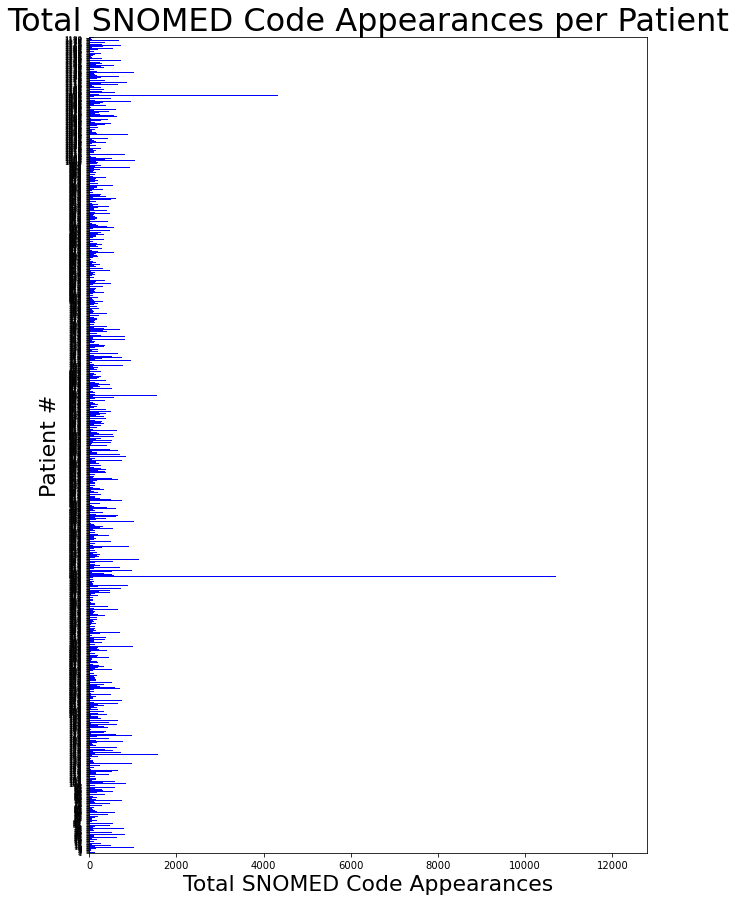

In [23]:
patient_numbers = [*range(1,(number_files) + 1)]
d = {'Patient #': patient_numbers, 'Total SNOMED Code Appearances': codetotallist}

df2 = pd.DataFrame(d)
df2_no_indices = df2.to_string(index=False)

plt.rcParams['figure.figsize'] = (10,15)
plt.barh("Patient #", "Total SNOMED Code Appearances", data = df2, color = "blue") 
#ind = df2_new.set_index("Patient #", inplace = True)
plt.xlabel("Total SNOMED Code Appearances", fontsize = 22) 
#plt.xticks(ind,fontsize = 18)
plt.ylabel("Patient #", fontsize = 22) 
plt.yticks(np.arange(1, number_files+1, 1))
plt.yticks(fontsize = 7)
plt.margins(y=0)
plt.title("Total SNOMED Code Appearances per Patient",fontsize = 32)
plt.show()

**Total Patients per Token (2/2) **

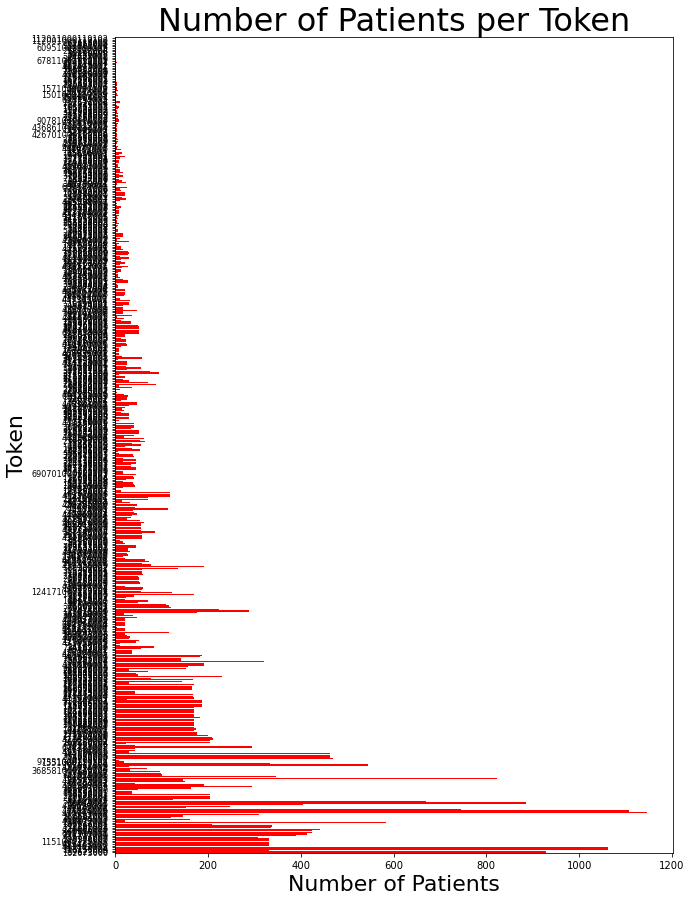

In [24]:
patientspertoken = []

# basically if a column has a row entry that is not 0, add 1
for i in range(0,len(column_names)):
        col_list = df[column_names[i]].tolist()
        newcounter = 0
        for j in range(0,len(col_list)):
            if col_list[j] != 0:
                newcounter = newcounter + 1
        patientspertoken.append(newcounter)
        
d = {'Token': column_names, 'Number of Patients': patientspertoken}

df3 = pd.DataFrame(d)
df3_no_indices = df3.to_string(index=False)

plt.rcParams['figure.figsize'] = (10,15)
plt.barh("Token", "Number of Patients", data = df3, color = "red") 
#ind = df2_new.set_index("Patient #", inplace = True)
plt.xlabel("Number of Patients", fontsize = 22) 
#plt.xticks(ind,fontsize = 18)
plt.ylabel("Token", fontsize = 22) 
plt.yticks(fontsize = 8)
plt.margins(y=0)
plt.title("Number of Patients per Token",fontsize = 32)
plt.show()

### Step 2: LDA - Preprocessing the Data
Usually this would include lemmatization and stemming, but since our data is SNOMED-coded it is much easier (SNOMED CT is the most comprehensive global language for health terms). PyMedTermino is used to check what a SNOMED code means, whether it is still in existence, and its relationships with parents and children.

In [26]:
#PREPROCESSING AND VECTORIZING
#list of the path for each patient
paths = []
#make a list of lists for each patient's SNOMED codes (row)
lists = []

directory = '/Users/davidwc2008/Documents/Summer 2020/ODA/Synthetic Mass/1K Synthetic EHR FHIR R4'
list_of_files = os.listdir(directory) 
number_files = len(list_of_files) - 1
print ("Number of files: ", number_files)

valid = 0 
invalid = 0

for entry in os.scandir(directory):
    holder = []
    if (entry.path.endswith(".json") and entry.is_file()):
        paths.append(entry.path)
        f = open(entry.path, "r")
        lines = f.readlines()
        line = [sub.replace(" ","") for sub in lines]
        line = iter(line)
        for line2 in line:
            if line2 == '"system":"http://snomed.info/sct",\n':
                line3 = next(line)
                line3 = line3.replace('"code":"', "")
                line3 = line3.replace('",\n',"")
                if SNOMEDCT.has_concept(line3):
                    a_string = SNOMEDCT[line3].term
                    split_string = a_string.split(" (", 1)
                    substring = split_string[0]
                    holder.append(substring)
                    valid = valid + 1
                else:
                    invalid = invalid + 1
        lists.append(holder)
        f.close()

print("# of valid SNOMED code appearances: ", valid)
print("# of invalid SNOMED code appearances: ", invalid)

#Print dataframe of document number and path
data = {'Document_No':[*range(0,number_files)], 'Path':paths} 
df = pd.DataFrame(data)
print(df.head(10))
df.to_csv('/Users/davidwc2008/Documents/Summer 2020/ODA/Synthetic Mass/document_paths.csv')

#Prints the topics in each document/for each patient
pprint(lists[1])

Number of files:  1180
# of valid SNOMED code appearances:  359203
# of invalid SNOMED code appearances:  2048
   Document_No                                               Path
0            0  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
1            1  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
2            2  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
3            3  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
4            4  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
5            5  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
6            6  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
7            7  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
8            8  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
9            9  /Users/davidwc2008/Documents/Summer 2020/ODA/S...
['Well child visit',
 'Never smoked tobacco',
 'Well child visit',
 'Well child visit',
 'Well child visit',
 'Never smoked tobacco',
 'Well child visit',
 'Well c

In [27]:
from gensim.corpora import Dictionary
dictionary = Dictionary(lists) # Gives a number to each PATIENT's codes

#print(dictionary)
#print(dictionary.token2id)

corpus = [dictionary.doc2bow(doc) for doc in lists]

print('Before processing we had 506 unique tokens. Now: ')
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Before processing we had 506 unique tokens. Now: 
Number of unique tokens: 496
Number of documents: 1180


### Step 3: Training the Model

In [8]:
#TRAINING
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token # Gives a number to each SNOMED code, starting at 1, 2, 3...

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=1 # Don't evaluate model perplexity, takes too much time.
)

print('General LDA')

# Compute Perplexity
print('\nPerplexity: ', model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
top_topics = model.top_topics(corpus)
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

# Compute Coherence Scores
from gensim.models.coherencemodel import CoherenceModel
umass_coherence_model_lda = CoherenceModel(model=model, texts=lists, dictionary=dictionary, coherence="u_mass")
cv_coherence_model_lda = CoherenceModel(model=model, texts=lists, dictionary=dictionary, coherence="c_v")

print('UMASS Coherence Score: ', umass_coherence_model_lda.get_coherence())
print('CV Coherence Score: ', cv_coherence_model_lda.get_coherence(), '\n')

from pprint import pprint
pprint(model.print_topics(num_topics=-1, num_words=10))

Before processing we had 506 unique tokens. Now: 
Number of unique tokens: 496
Number of documents: 1180
General LDA

Perplexity:  -3.392522203817251
UMASS Coherence Score:  -2.1264878480824696
CV Coherence Score:  0.5223397085726448 

[(0,
  '0.209*"Outpatient procedure" + 0.208*"Subcutaneous immunotherapy" + '
  '0.176*"Combined chemotherapy and radiation therapy" + 0.084*"Hearing '
  'examination" + 0.053*"Emergency hospital admission" + 0.036*"Encounter for '
  'problem" + 0.017*"Thoracic structure" + 0.015*"Medication Reconciliation" + '
  '0.013*"Extraction of wisdom tooth" + 0.012*"General examination of '
  'patient"'),
 (1,
  '0.283*"Well child visit" + 0.140*"Medication Reconciliation" + '
  '0.102*"Encounter for symptom" + 0.101*"Never smoked tobacco" + 0.028*"Viral '
  'sinusitis" + 0.026*"Emergency room admission" + 0.023*"Person in the '
  'healthcare environment" + 0.020*"Otitis media" + 0.020*"Acute viral '
  'pharyngitis" + 0.017*"Encounter for "check-up""'),
 (2,
  '0

In [9]:
# Visualize the topics
import pyLDAvis.gensim
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.217111  0.276479       1        1  21.051723
6     -0.023925 -0.133326       2        1  20.357718
4      0.368615  0.163385       3        1  15.842594
9      0.109916 -0.162062       4        1  11.367444
1     -0.018438 -0.120522       5        1  10.271705
5     -0.028525 -0.149068       6        1   7.308131
8     -0.184317  0.094663       7        1   5.225179
0      0.160573  0.154572       8        1   4.415828
7     -0.038152 -0.170075       9        1   2.762273
2     -0.128635  0.045955      10        1   1.397411, topic_info=                         Term          Freq         Total Category  logprob  \
8       Encounter for problem  32661.000000  32661.000000  Default  30.0000   
13        Follow-up encounter  10036.000000  10036.000000  Default  29.0000   
55         Urgent care clinic  13219.000000  13219.000000  Default  28.0000   
45           Well child visit  10569.000000  10569.000000  Default  27.0000   
449            Renal dialysis  12335.000000  12335.000000  Default  26.0000   
..                        ...           ...           ...      ...      ...   
33   Emergency room admission     17.554813   6723.492676  Topic10  -5.6558   
2                      Anemia      9.034110   1355.829468  Topic10  -6.3201   
34   Encounter for "check-up"     13.158654  13695.840820  Topic10  -5.9440   
10     Essential hypertension      7.767094   1326.411255  Topic10  -6.4712   
8       Encounter for problem      7.157281  32661.947266  Topic10  -6.5530   

     loglift  
8    30.0000  
13   29.0000  
55   28.0000  
45   27.0000  
449  26.0000  
..       ...  
33   -1.6775  
2    -0.7406  
34   -2.6772  
10   -0.8698  
8    -4.1553  

[563 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
173       2  0.042562                            Acute allergic reaction
173       5  0.936361                            Acute allergic reaction
173       8  0.021281                            Acute allergic reaction
0         1  0.054170                          Acute bacterial sinusitis
0         2  0.598328                          Acute bacterial sinusitis
...     ...       ...                                                ...
45        8  0.010597                                   Well child visit
45        9  0.000095                                   Well child visit
262       2  0.033996  [X]Persons encountering health services in cir...
262       6  0.843111  [X]Persons encountering health services in cir...
262       9  0.118988  [X]Persons encountering health services in cir...

[1263 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 5, 10, 2, 6, 9, 1, 8, 3])

Lambda determines how much weight is put on the gneral frequency of a token (code) vs. the exclusivity of that token to a given topic. A higher lambda focuses on the general frequency, a lower lambda focuses on the exclusivity.

### Step 4: Optimizing the Model

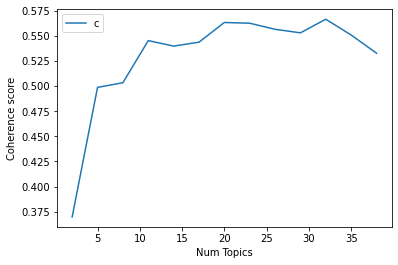

In [10]:
def compute_coherence_values_numtopics(corpus, dictionary, chunksize, iterations, texts, limit, start, step, passes):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaModel(
            corpus=corpus,
            id2word = dictionary.id2token,
            chunksize=chunksize,
            alpha='auto',
            eta='auto',
            iterations=iterations,
            num_topics=num_topics,
            passes=passes,
            eval_every=1
        )
        model_list.append(model)
        
        cv_coherence_model_lda = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence="c_v")
        coherence_values.append(cv_coherence_model_lda.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values_numtopics(dictionary=dictionary, corpus=corpus, chunksize=chunksize, iterations=iterations, texts=lists, limit=40, start=2, step=3, passes=passes)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

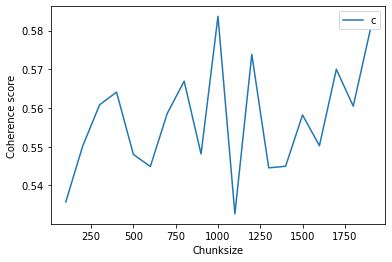

In [11]:
def compute_coherence_values_chunksize(corpus, dictionary, iterations, texts, limit, start, step, passes):
    coherence_values = []
    model_list = []
    
    for chunksize in range(start, limit, step):
        model = LdaModel(
            corpus=corpus,
            id2word = dictionary.id2token,
            chunksize=chunksize,
            alpha='auto',
            eta='auto',
            iterations=iterations,
            num_topics=20,
            passes=passes,
            eval_every=1
        )
        model_list.append(model)
        
        cv_coherence_model_lda = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence="c_v")
        coherence_values.append(cv_coherence_model_lda.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values_chunksize(dictionary=dictionary, corpus=corpus, iterations=iterations, texts=lists, limit=2000, start=100, step=100, passes=passes)
# Show graph
limit=2000; start=100; step=100;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Chunksize")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

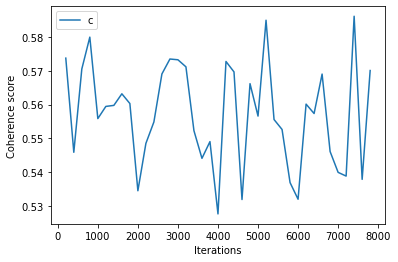

In [12]:
def compute_coherence_values_iterations(corpus, dictionary, texts, limit, start, step, passes):
    coherence_values = []
    model_list = []
    
    for iterations in range(start, limit, step):
        model = LdaModel(
            corpus=corpus,
            id2word = dictionary.id2token,
            chunksize=1000,
            alpha='auto',
            eta='auto',
            iterations=iterations,
            num_topics=20,
            passes=passes,
            eval_every=1
        )
        model_list.append(model)
        
        cv_coherence_model_lda = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence="c_v")
        coherence_values.append(cv_coherence_model_lda.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values_iterations(dictionary=dictionary, corpus=corpus, texts=lists, limit=8000, start=200, step=200, passes=passes)
# Show graph
limit=8000; start=200; step=200;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

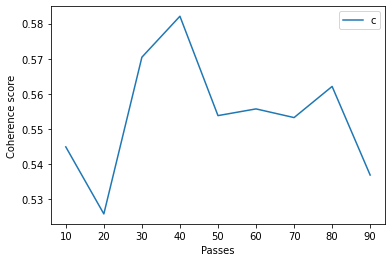

In [13]:
def compute_coherence_values_passes(corpus, dictionary, texts, limit, start, step):
    coherence_values = []
    model_list = []
    
    for passes in range(start, limit, step):
        model = LdaModel(
            corpus=corpus,
            id2word = dictionary.id2token,
            chunksize=1000,
            alpha='auto',
            eta='auto',
            iterations=5000,
            num_topics=20,
            passes=passes,
            eval_every=1
        )
        model_list.append(model)
        
        cv_coherence_model_lda = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence="c_v")
        coherence_values.append(cv_coherence_model_lda.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values_passes(dictionary=dictionary, corpus=corpus, texts=lists, limit=100, start=10, step=10)
# Show graph
limit=100; start=10; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Passes")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
model2 = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=1000,
    alpha='auto',
    eta='auto',
    iterations=5000,
    num_topics=20,
    passes=40,
    eval_every=1 # Don't evaluate model perplexity, takes too much time.
)

print("Model - Optimized based on CV coherence score")

# Compute Coherence Scores
umass_coherence_model_lda = CoherenceModel(model=model2, texts=lists, dictionary=dictionary, coherence="u_mass")
cv_coherence_model_lda = CoherenceModel(model=model2, texts=lists, dictionary=dictionary, coherence="c_v")

print('UMASS Coherence Score: ', umass_coherence_model_lda.get_coherence())
print('CV Coherence Score: ', cv_coherence_model_lda.get_coherence(), '\n')

pprint(model2.print_topics(num_topics=-1, num_words=10))

Model - Optimized based on CV coherence score
UMASS Coherence Score:  -1.5324156069122508
CV Coherence Score:  0.5719393414259704 

[(0,
  '0.370*"Intramuscular injection" + 0.359*"Patient encounter procedure" + '
  '0.065*"Consultation for treatment" + 0.031*"General examination of patient" '
  '+ 0.025*"Encounter for symptom" + 0.020*"Medication Reconciliation" + '
  '0.012*"Acute viral pharyngitis" + 0.010*"Person in the healthcare '
  'environment" + 0.010*"Viral sinusitis" + 0.009*"Never smoked tobacco"'),
 (1,
  '0.259*"Emergency room admission" + 0.181*"Sprain of ankle" + '
  '0.096*"Information gathering" + 0.096*"Domiciliary or rest home patient '
  'evaluation and management" + 0.080*"Stretching exercises" + 0.080*"Physical '
  'therapy procedure" + 0.080*"Rest, ice, compression and elevation treatment '
  'program" + 0.032*"Acute viral pharyngitis" + 0.031*"Encounter for symptom" '
  '+ 0.021*"Pulmonary emphysema"'),
 (2,
  '0.112*"Auscultation of the fetal heart" + 0.112*"E

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model2, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.104377 -0.058964       1        1  20.137594
3     -0.200917  0.068441       2        1  17.579489
18     0.385145  0.036028       3        1  10.143090
6     -0.113876  0.093151       4        1   9.447653
16    -0.151738  0.104560       5        1   8.568952
14    -0.130662  0.036185       6        1   6.273529
19     0.260180  0.043452       7        1   4.461088
7      0.307244  0.071311       8        1   3.203569
0     -0.166943  0.032032       9        1   3.191140
8     -0.207706  0.051978      10        1   2.961635
9     -0.066187 -0.004699      11        1   2.396274
4      0.027848  0.005213      12        1   2.225212
12    -0.090071  0.113845      13        1   1.935994
10     0.226499  0.081715      14        1   1.543241
17    -0.168472  0.031235      15        1   1.525863
5      0.021401  0.048801      16        1   1.463104
15    -0.026479 -0.367370      17        1   0.818752
1     -0.055570  0.070871      18        1   0.802462
11    -0.054002 -0.382919      19        1   0.728278
13     0.308684 -0.074865      20        1   0.593077, topic_info=                               Term          Freq         Total Category  \
8             Encounter for problem  32623.000000  32623.000000  Default   
55               Urgent care clinic  13523.000000  13523.000000  Default   
449                  Renal dialysis  12313.000000  12313.000000  Default   
13              Follow-up encounter   9688.000000   9688.000000  Default   
45                 Well child visit  10654.000000  10654.000000  Default   
..                              ...           ...           ...      ...   
331           Laceration of forearm      8.788268    164.053955  Topic20   
23                      Prediabetes     13.674454   1585.396362  Topic20   
18        Medication Reconciliation     21.044796  17691.716797  Topic20   
14   General examination of patient     13.400025  21992.416016  Topic20   
34         Encounter for "check-up"      8.339779  13523.520508  Topic20   

     logprob  loglift  
8    30.0000  30.0000  
55   29.0000  29.0000  
449  28.0000  28.0000  
13   27.0000  27.0000  
45   26.0000  26.0000  
..       ...      ...  
331  -5.4906   2.2008  
23   -5.0485   0.3745  
18   -4.6174  -1.6066  
14   -5.0688  -2.2756  
34   -5.5430  -2.2635  

[964 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
173      14  0.988302                            Acute allergic reaction
0         1  0.034139                          Acute bacterial sinusitis
0         2  0.587197                          Acute bacterial sinusitis
0         5  0.293598                          Acute bacterial sinusitis
0         6  0.068279                          Acute bacterial sinusitis
...     ...       ...                                                ...
120      17  0.026827                                         Wound care
261      13  0.982778                             Wrist region structure
262       2  0.642404  [X]Persons encountering health services in cir...
262       6  0.234120  [X]Persons encountering health services in cir...
262      15  0.119915  [X]Persons encountering health services in cir...

[1258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 19, 7, 17, 15, 20, 8, 1, 9, 10, 5, 13, 11, 18, 6, 16, 2, 12, 14])

### Step 5: Further Analysis

In [28]:
#Finding the dominant topic in each document

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model2, corpus, lists)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.to_csv('/Users/davidwc2008/Documents/Summer 2020/ODA/Synthetic Mass/dominant_topic.csv')
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9232,"General examination of patient, Encounter for ...","[General examination of patient, Essential hyp..."
1,1,16.0,0.7610,"Well child visit, Medication Reconciliation, N...","[Well child visit, Never smoked tobacco, Well ..."
2,2,3.0,0.7352,"General examination of patient, Encounter for ...","[General examination of patient, Body mass ind..."
3,3,16.0,0.9887,"Well child visit, Medication Reconciliation, N...","[Well child visit, Never smoked tobacco, Well ..."
4,4,16.0,0.9880,"Well child visit, Medication Reconciliation, N...","[Well child visit, Never smoked tobacco, Medic..."
5,5,2.0,0.8329,"Auscultation of the fetal heart, Examination o...","[General examination of patient, Chronic obstr..."
6,6,3.0,0.4528,"General examination of patient, Encounter for ...","[Encounter for symptom, Acute bacterial sinusi..."
7,7,6.0,0.5618,"Urgent care clinic, Encounter for ""check-up"", ...","[Cardiac arrest, Cardiac arrest, History of ca..."
8,8,3.0,0.8082,"General examination of patient, Encounter for ...","[General examination of patient, Never smoked ..."
9,9,16.0,0.9956,"Well child visit, Medication Reconciliation, N...","[Well child visit, Never smoked tobacco, Well ..."


In [29]:
#Find the most representative document for each topic (that is a dominant topic)

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Document_No', 'Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.to_csv('/Users/davidwc2008/Documents/Summer 2020/ODA/Synthetic Mass/most_rep_doc.csv')
sent_topics_sorteddf_mallet.head(10)

,Document_No,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,492,0.0,0.9980,"Intramuscular injection, Patient encounter pro...","[Consultation for treatment, Consultation for ..."
1,438,2.0,0.9837,"Auscultation of the fetal heart, Examination o...","[General examination of patient, Essential hyp..."
2,162,3.0,0.9970,"General examination of patient, Encounter for ...","[General examination of patient, Essential hyp..."
3,1072,4.0,0.9417,"Outpatient procedure, Subcutaneous immunothera...","[Encounter for symptom, Perennial allergic rhi..."
4,1091,5.0,0.8093,"Emergency hospital admission, Extraction of wi...","[General examination of patient, Essential hyp..."
5,1089,6.0,0.9571,"Urgent care clinic, Encounter for ""check-up"", ...","[General examination of patient, Body mass ind..."
6,794,7.0,0.8176,"Encounter for problem, Emergency room admissio...","[Encounter for ""check-up"", Encounter for ""chec..."
7,244,8.0,0.9953,"Consultation for treatment, General examinatio...","[Prenatal initial visit, Normal pregnancy, Spo..."
8,1010,9.0,0.9992,"Smokes tobacco daily, Digital examination of r...","[Well child visit, Body mass index 30+ - obesi..."
9,965,10.0,0.8361,"Encounter for problem, Cognitive and behaviora...","[Encounter for problem, Donor of control mater..."


In [30]:
#Topic distribution across documents

# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.to_csv('/Users/davidwc2008/Documents/Summer 2020/ODA/Synthetic Mass/topic_distribution.csv')
df_dominant_topics.head(10)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,3.0,"General examination of patient, Encounter for ...",31.0,0.0263
1.0,16.0,"Well child visit, Medication Reconciliation, N...",NaN,NaN
2.0,3.0,"General examination of patient, Encounter for ...",164.0,0.1390
3.0,16.0,"Well child visit, Medication Reconciliation, N...",447.0,0.3788
4.0,16.0,"Well child visit, Medication Reconciliation, N...",19.0,0.0161
5.0,2.0,"Auscultation of the fetal heart, Examination o...",7.0,0.0059
6.0,3.0,"General examination of patient, Encounter for ...",38.0,0.0322
7.0,6.0,"Urgent care clinic, Encounter for ""check-up"", ...",27.0,0.0229
8.0,3.0,"General examination of patient, Encounter for ...",31.0,0.0263
9.0,16.0,"Well child visit, Medication Reconciliation, N...",6.0,0.0051


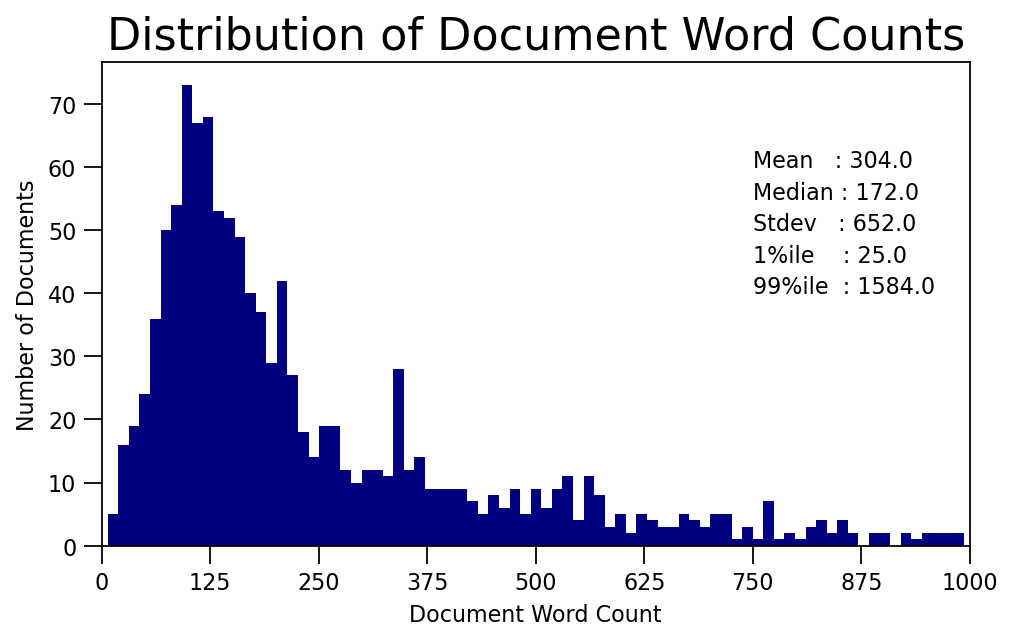

In [31]:
# Distribution of Document SNOMED word counts

doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(7,4), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 60, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  55, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  50, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  45, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  40, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=8)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=20))
plt.show()

### Step 6: Visualizing Patients

In [34]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(model2[corpus]):
    topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 20
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics (Dominant Topics Only)".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1157 samples in 0.001s...
[t-SNE] Computed neighbors for 1157 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1157
[t-SNE] Computed conditional probabilities for sample 1157 / 1157
[t-SNE] Mean sigma: 0.001772
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.284966
[t-SNE] KL divergence after 1000 iterations: 0.426025


Loading BokehJS ...

*Still need to add legend and hovering abilities*

## Conclusions and Next Steps
Through optimization, we increased the CV topic coherence score from 0.52 to 0.57 (10% increase). Without studying every single permutation of different parameters for our LDA model, this is reasonably significant. 

Looking ahead-
1. Look to incorporate Mallet (It has been shown to be an even better implementation of LDA than gensim's LDA)
2. Explore cutting out certain patients or tokens that have low relevance or low counts
3. Incorporate other aspects of a patients EHR data such as temporal aspects and geographical elements (besides only SNOMED codes)
4. Look at other topic modelling algorithms (LSA, tfidf)
5. Other visualization possibilities - UMAP and Tensorboard

![UMAP](/Users/davidwc2008/Downloads/UMAP.jpg)
[Tensorboard](http://projector.tensorflow.org/?config=https://raw.githubusercontent.com/parulsethi/DocViz/master/movie_plot_config.json)


